#### Digit recognition using scikit lear neural networks

In [1]:
#### Digit recognition using scikit-learn neural networks

import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
import numpy as np

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('mnist_784.csv')
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [3]:
df.describe()
df['class'].value_counts()

class
1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: count, dtype: int64

In [4]:
new_columns = {
    old_name: str(i)
    for i, old_name in enumerate(df.columns)
    if old_name != 'class'
}
df = df.rename(columns=new_columns)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [5]:
X = df.drop(columns='class')
y = df['class']

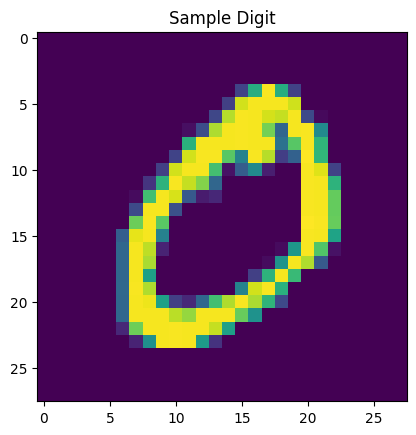

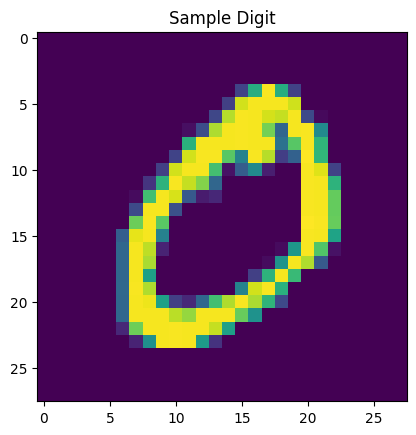

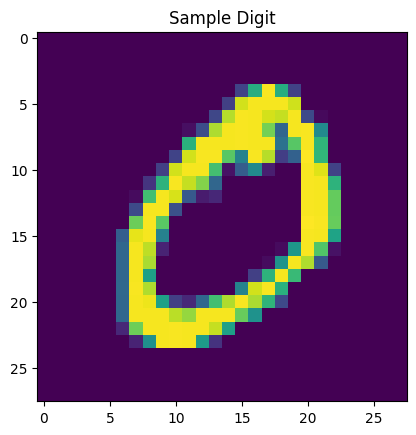

In [16]:
for i in range(3):
    plt.imshow(X.loc[1].values.reshape(28,28))
    plt.title("Sample Digit")
    plt.show()

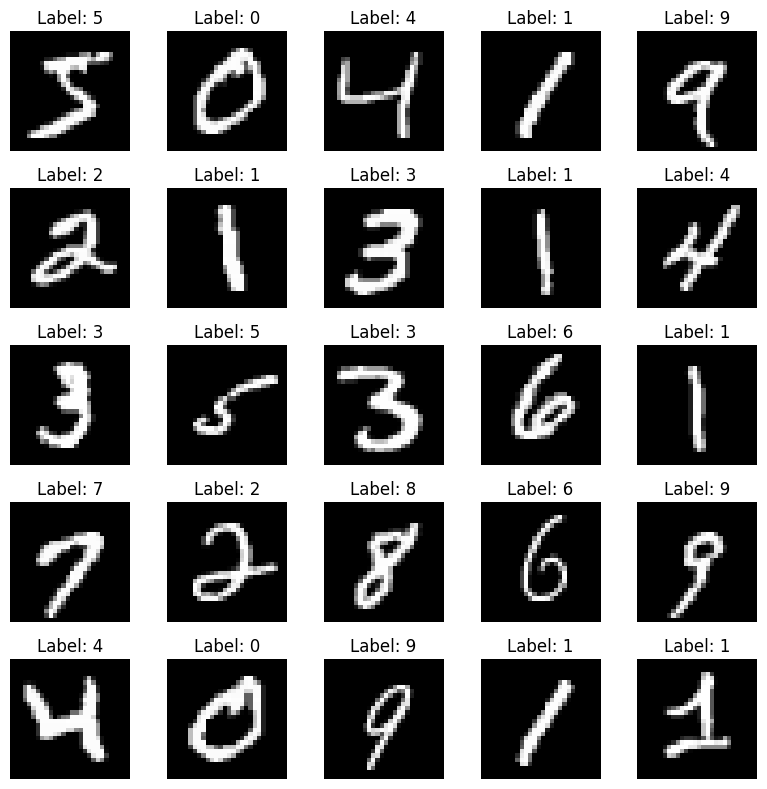

In [7]:
fix, axes = plt.subplots(5, 5, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {df['class'].iloc[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

mlp = MLPClassifier(hidden_layer_sizes=(1,), activation='relu', max_iter=10)
mlp1 = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=10)
mlp2 = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=10)

mlp.fit(X_train, y_train)
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)

predictions_NN = mlp.predict(X_test)
predictions_NN1 = mlp1.predict(X_test)
predictions_NN2 = mlp2.predict(X_test)

c:\Users\PC GAMER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\PC GAMER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\PC GAMER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Actual Value: 8
Predicted: 1


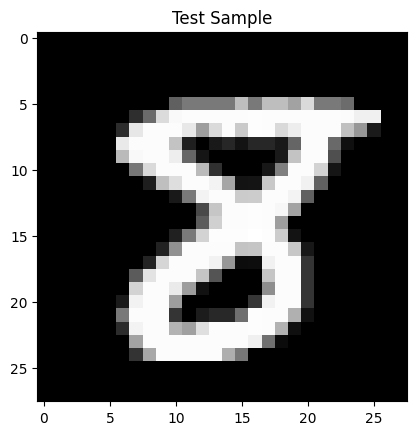

In [9]:
print(f'Actual Value: {y_test.iloc[0]}')
print(f'Predicted: {predictions_NN[0]}')

plt.imshow(X_test.iloc[0].values.reshape(28,28), cmap='gray')
plt.title("Test Sample")
plt.show()

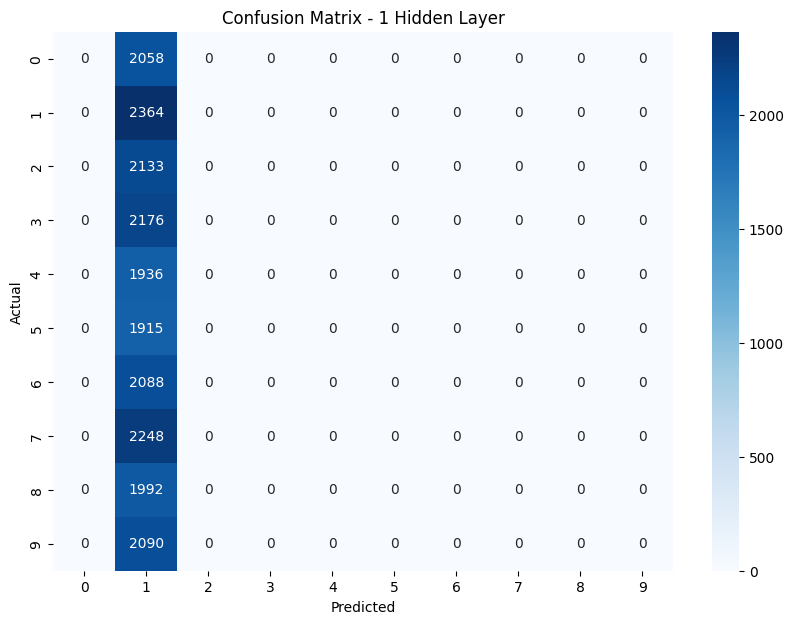

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, predictions_NN), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - 1 Hidden Layer")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

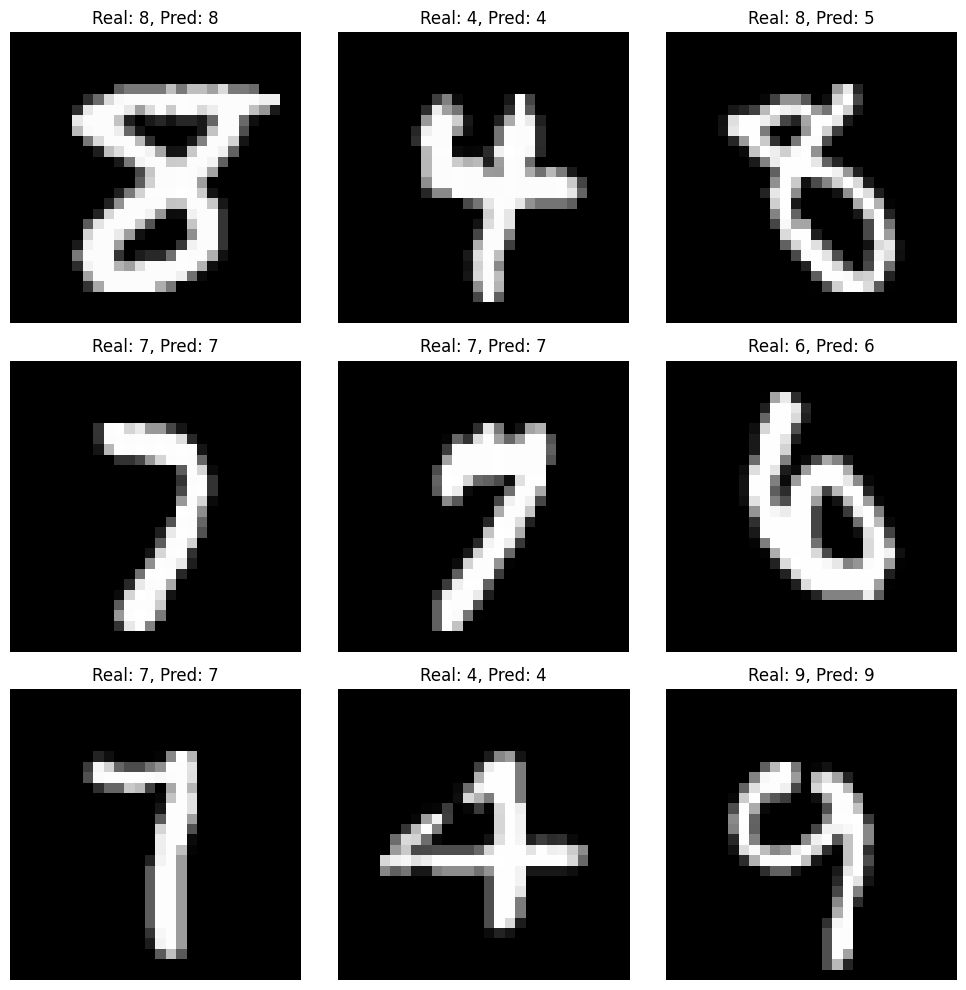

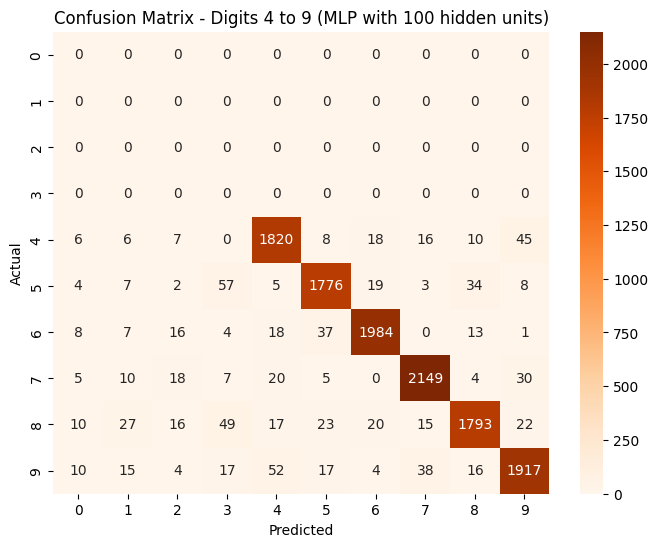

In [15]:
# Filtrar solo los dígitos del 4 al 9 del conjunto de prueba
mask = y_test.isin([4, 5, 6, 7, 8, 9])
X_filtered = X_test[mask].reset_index(drop=True)
y_filtered = y_test[mask].reset_index(drop=True)

# Predecir con el modelo mlp2 (el más complejo)
y_pred_filtered = mlp2.predict(X_filtered)

# Visualizar 9 ejemplos
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_filtered.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f"Real: {y_filtered[i]}, Pred: {y_pred_filtered[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Matriz de confusión para estos dígitos
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_filtered, y_pred_filtered), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Digits 4 to 9 (MLP with 100 hidden units)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

